# Welcome to the first notebook!

In this session we will work on a real-world dataset related to prediction of house price in a district.

The first thing you will do is to know how to run the code... see the `Run` button above?

You can also use the shortcut Ctrl + Enter.

Below is the first block of Python code to run - do not worry about what it means, these are mostly utilities and importing useful packages.

In [3]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
rnd = 1
np.random.seed(rnd)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "1"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

print("Hello World!")

Hello World!


# 1. Prepare data

We will use a dataset of California census data 1990.

In [4]:
HOUSING_PATH = os.path.join("data", "housing")

In [5]:
# Load data
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)
housing = load_housing_data()

OK, the data is loaded, which is named `housing`. `housing` is a Pandas DataFrame object which resembles your (familiar) Excel sheet.  

Let's look at the first 5 rows of data with the `head` method:

In [7]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


`Pandas` provides a lot of methods to interact and summarize data. For example, we can check on the basic statistics of each feature using the `describe` method:

In [8]:
housing.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


Nothing speaks more than a beautiful picture. `Pandas` provides some plotting methods, but there are a lot of Python packages specialised on drawing graphs, for example `matplotlib`, `seaborn`, `plotly` and `bokeh`, just to name a few.

Let's start with something simple: since we have the Latitude and Longitude, what about a plot on the map?

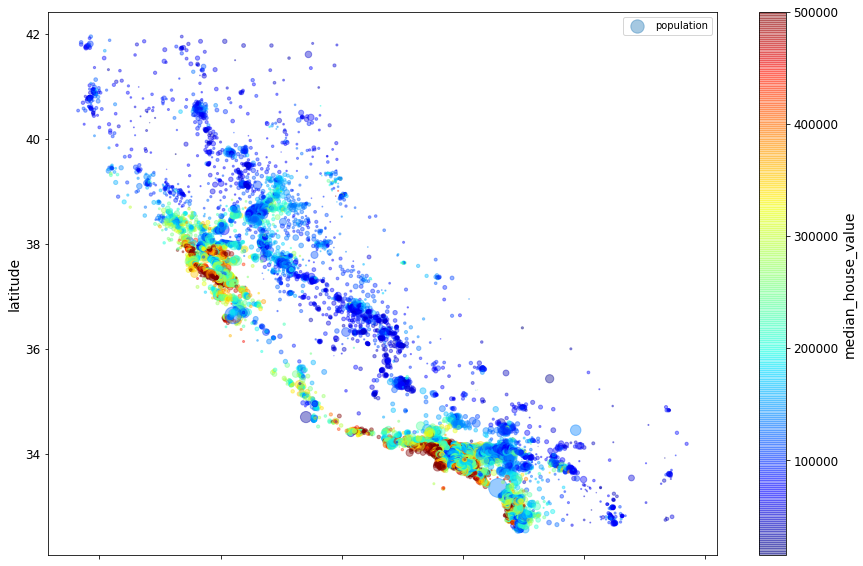

In [10]:
# plot 3D
# each dot is one sample on map, size of a dot proportional to population and color represents media house price.
# you may try to overlay an actual geographic map below the points!

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=housing["population"]/100, label="population", figsize=(15,10),
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
) 
plt.legend()

### Warning - you should NOT do this!
In a real machine learning project, we should plot a lot and a lot of graphs to look for abnormality, understand the physical meaning, gain insight, and develop questions etc. But for the sake of the moment, we will jump into modeling and come back later.
### End of Warning

For simplicity, we will only use 1,000 rows of the data (i.e. 1,000 samples).

Again, let's show the top 5 rows:

In [11]:
# Select a subset of 1,000 samples
housing = housing.sample(n=1000, random_state=np.random.seed(rnd))
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,<1H OCEAN
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,INLAND
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,NEAR BAY
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,NEAR BAY
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,<1H OCEAN


Another quick way to look for missing value: the `info` method:

In [13]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 4712 to 14893
Data columns (total 10 columns):
longitude             1000 non-null float64
latitude              1000 non-null float64
housing_median_age    1000 non-null float64
total_rooms           1000 non-null float64
total_bedrooms        988 non-null float64
population            1000 non-null float64
households            1000 non-null float64
median_income         1000 non-null float64
median_house_value    1000 non-null float64
ocean_proximity       1000 non-null object
dtypes: float64(9), object(1)
memory usage: 85.9+ KB


In [14]:
housing.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,1000.000000,1000.000000,1000.000000,1000.000000,988.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,425
mean,-119.648240,35.763020,28.408000,2557.210000,521.513158,1389.370000,482.074000,3.827771,200858.733000,NaN
std,2.015895,2.198065,12.338711,2165.012064,417.164711,1101.583763,376.400398,1.910820,112682.919682,NaN
min,-124.230000,32.570000,2.000000,25.000000,5.000000,13.000000,5.000000,0.499900,39400.000000,NaN
25%,-121.840000,33.967500,18.000000,1365.500000,283.000000,751.750000,267.250000,2.459200,114100.000000,NaN
50%,-118.965000,34.430000,28.000000,2084.000000,423.000000,1175.000000,401.000000,3.432300,174400.000000,NaN
75%,-118.040000,37.780000,36.000000,3090.750000,625.000000,1679.250000,596.000000,4.779175,259125.000000,NaN


As we see, the dataset contains 1K rows (samples) with 10 attributes. 

Note there is one categorical variable `ocean_proximity`. (scroll to the right if you cannot see it).

## In this exercise, we will build a model to predict the `median_house_value`.

Let's start by plotting a histogram of our 'target': `median_house_value`. There is a `hist` method that comes in handy:

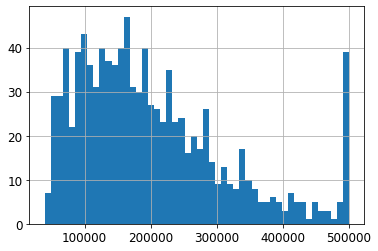

In [16]:
housing['median_house_value'].hist(bins=50)  # 50 bins

Notice the suspicious spike near $500K? In practice we should go back to the data soucrce and look for the reason. It may even redefine our goal and problem!

But for now, let's simply filter them out to simplifiy the problem.

In [17]:
# filter out samples with median_house_value >= 500,000
housing_flt = housing[housing['median_house_value'] < 500000]

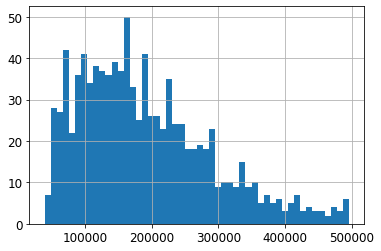

In [18]:
housing_flt['median_house_value'].hist(bins=50)

Yet another handy method (actually a `property`, to be precise) to get the shape of data: `shape`

In [18]:
# We have filtered out 35 (1000-965) records
housing_flt.shape

(965, 10)

In [19]:
housing_flt.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,965.000000,965.000000,965.000000,965.000000,953.000000,965.000000,965.000000,965.000000,965.000000,965
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,410
mean,-119.640891,35.778415,28.250777,2558.786528,524.848898,1404.659067,485.263212,3.686471,190009.015544,NaN
std,2.017371,2.210061,12.253855,2169.445581,418.533414,1108.411734,377.572212,1.664942,98952.682076,NaN
min,-124.230000,32.570000,2.000000,25.000000,5.000000,13.000000,5.000000,0.499900,39400.000000,NaN
25%,-121.830000,33.960000,18.000000,1371.000000,287.000000,766.000000,271.000000,2.443200,112500.000000,NaN
50%,-118.970000,34.440000,28.000000,2085.000000,425.000000,1181.000000,403.000000,3.362100,170800.000000,NaN
75%,-118.030000,37.780000,36.000000,3078.000000,632.000000,1694.000000,597.000000,4.679300,245500.000000,NaN


...how about listing the linear correlation between our target and each feature?

In [21]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.677302
housing_median_age    0.126262
total_rooms           0.118840
households            0.051337
total_bedrooms        0.034870
longitude            -0.017178
population           -0.017261
latitude             -0.180301
Name: median_house_value, dtype: float64

#### Reflection: does the correlation make sense?

Now we have the data, what's next?

Before we dive in, there is a very important step to do: let's split the data set into 2, one for training the model (commonly called the * *training set* *) and the other for evaluation (the * *test set* *).

This is **VERY IMPORTANT** in modeling - we need to hold out a set of data, which is not known by the model, to evaluate how well the model perform.

An analogue, in school - we are *__trained__* with materials in lessons (reading, lectures...). To evaluate how well we understand the materials, we are *__tested__* in with materials that are relevant, but not known in advance (i.e. examination). Otherwise we will simply recite (* *memorize* *) the questions and answers in exam and get a good score, without actually understand the materials at all!

### Question: what problem will it pose if a model has access to the test data during training?
Hint: you will know in coming lecture!

In [22]:
# Split the data into train and test set (90:10 split)
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing_flt, test_size=0.1)

# 2. Train the first model

OK, time to begin modeling!

As a start, let's use the only 1 feature, `median_income`, to predict our target (label), `median_house_value`.

In [24]:
# Use only 2 columns, "median_income" and "median_house_value"
usecols = ['median_income', 'median_house_value']
train_set_univariate = train_set[usecols]
test_set_univariate = test_set[usecols]

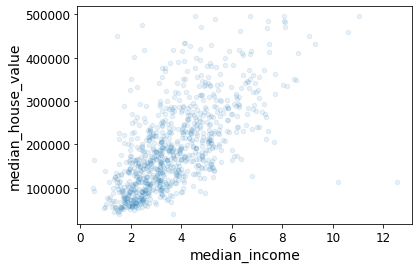

In [25]:
# Draw a plot first...
train_set_univariate.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

OK, the relationship looks quite linear... (expected, it is what our correlation table above told us). 

Therefore, how about we start with one of the most common and simplest model, the *Univariate Linear Regression*?

### Question: what is the formula of a simple (univariate) linear model?

We will use a Python package, Scikit-Learn `sklearn`, for the model training etc..

In [26]:
# import the Linear Regression model
from sklearn.linear_model import LinearRegression
# import an error metric (in this case the mean squared error, MSE)
from sklearn.metrics import mean_squared_error

train_set_univariate__X = np.array(train_set_univariate['median_income']).reshape(-1, 1)  # preparing feature (data X)
train_set_univariate__y = train_set_univariate['median_house_value']  # preparing the target (y)

linear_reg = LinearRegression()
linear_reg.fit(X=train_set_univariate__X, y=train_set_univariate__y)  # feed X and y into the linear model, ask it to 'train'

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

The model is trained. (Yes, done!)

Let's show its parameters:

In [30]:
print("Slope `m`: {:,.2f}\nIntercept `c`: {:,.2f}".format(linear_reg.coef_[0], linear_reg.intercept_))

Slope `m`: 38,804.69
Intercept `c`: 47,183.11


### Question: what is the formula of the trained model?

Time to test how well our model is doing - as the first thing, how about applying this model on the training data, get the predictions, and draw some graphs?

### Warning: this is NOT the correct way to evaluate a model - we should use a validation or test set. This is only for sake of illusration.

In [31]:
# get predictions for train set
train_set_univariate__y_pred = linear_reg.predict(train_set_univariate__X)

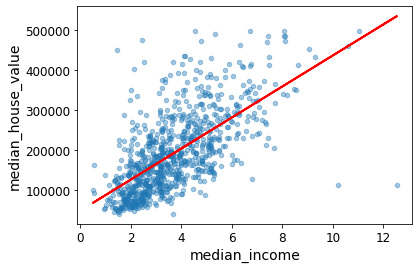

In [33]:
# plot a grahp
train_set_univariate.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.4)
plt.plot(train_set_univariate__X, train_set_univariate__y_pred, color='red', linewidth=2)

In [34]:
# evaluate
from sklearn import metrics

def print_eval(y_true, y_pred):
    print('Average target in train set: {:,.0f}'.format(y_true.mean()))
    print('Mean Absolute Error on train set: {:,.0f}'.format(metrics.mean_absolute_error(y_true, y_pred)))
    print('Root Mean Squared Error on train set: {:,.0f}'.format(np.sqrt(metrics.mean_squared_error(y_true, y_pred))))
    print('Relative Root Mean Squared Error on train set: {:.2f} %'.format(100 * np.sqrt(metrics.mean_squared_error(y_true, y_pred))/y_true.mean()))
    print('R^2 of train set: {:,.2f}'.format(metrics.r2_score(y_true, y_pred)))
    return None

print_eval(train_set_univariate__y, train_set_univariate__y_pred)

Average target in train set: 190,062
Mean Absolute Error on train set: 56,742
Root Mean Squared Error on train set: 74,985
Relative Root Mean Squared Error on train set: 39.45 %
R^2 of train set: 0.42


## Exercise 1
In the example above, the predictions (red line) seems skewed towards clockwise direction, probably due to the few data points with high `median_income`.

Let's assume the data points with `median_income` > 9 are outlier, repeat the modeling process (prepare data, train model) above and draw a graph of the result.

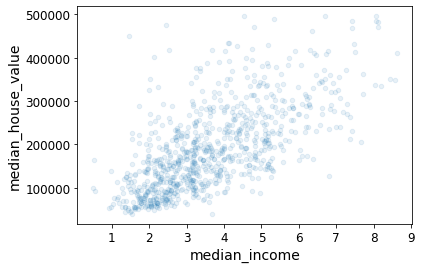

In [35]:
# Solution
# fliter out median_income > 9
train_set_univariate_flt = train_set_univariate[train_set_univariate['median_income']<=9]
train_set_univariate_flt.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

In [36]:
# prepare X (data) and y (label)
train_set_univariate__X_flt = np.array(train_set_univariate_flt['median_income']).reshape(-1, 1)
train_set_univariate__y_flt = train_set_univariate_flt['median_house_value']

# train
linear_reg_flt = LinearRegression()
linear_reg_flt.fit(X=train_set_univariate__X_flt, y=train_set_univariate__y_flt)

# get predictions
train_set_univariate__y_flt_pred = linear_reg_flt.predict(train_set_univariate__X_flt)

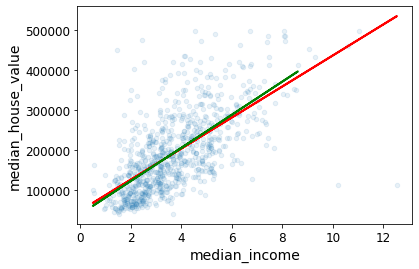

In [37]:
# plot the original data set, original model and new model
train_set_univariate.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
plt.plot(train_set_univariate__X, train_set_univariate__y_pred, color='red', linewidth=2)
plt.plot(train_set_univariate__X_flt, train_set_univariate__y_flt_pred, color='green', linewidth=2)

You can see that the line shift a little to the anti-clockwise direction, but not much - this is because we have a lot more data samples in 'dense' area, making the model quite robust.

# 3. Improve model performance

The performace is not great - an RMSE of ~70K to a target of ~200K is a bit too high, even on train set...

What can we do to improve?

There are a few things we can try:

1. Collect more samples
2. Try a different combination of features
3. Try a different models

Let's try #2 and use more features!

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa00d960990>,
      dtype=object)

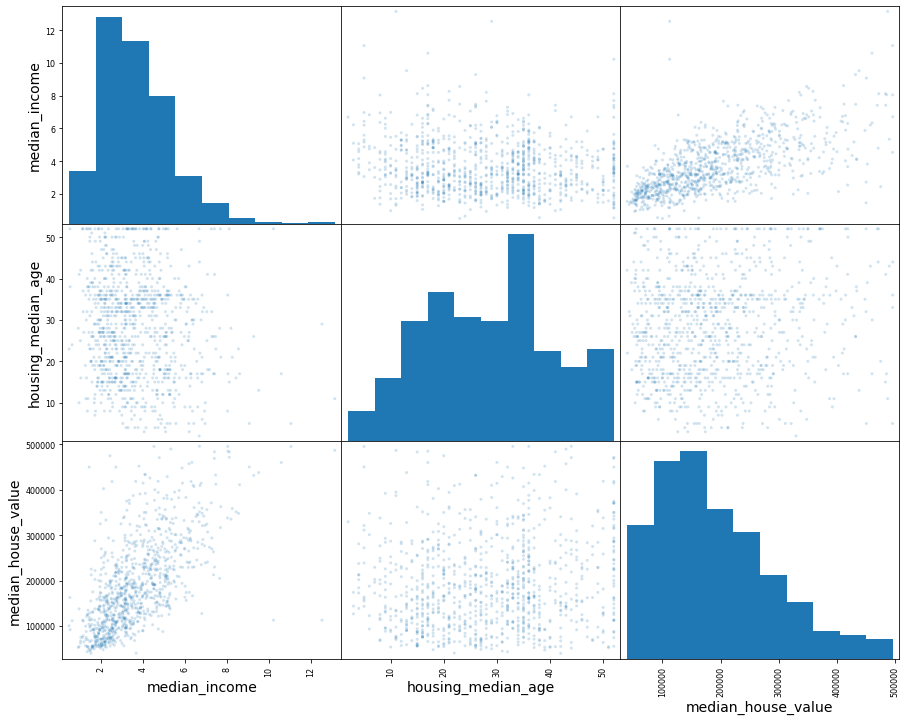

In [38]:
# Try adding a new feature, 'households'
usecols = ['median_income', 'housing_median_age', 'median_house_value']
from pandas.plotting import scatter_matrix
scatter_matrix(housing_flt[usecols], alpha=0.2, figsize=(15, 12), diagonal='hist')

In [39]:
# Again, prepare train and test sets
train_set_bivariates = train_set[usecols]
test_set_bivariates = test_set[usecols]

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

train_set_bivariates__X = train_set_bivariates[['median_income', 'housing_median_age']]
train_set_bivariates__y = train_set_bivariates['median_house_value']

linear_reg_2 = LinearRegression()
linear_reg_2.fit(X=train_set_bivariates__X, y=train_set_bivariates__y)

# get predictions
train_set_bivariates__pred = linear_reg_2.predict(train_set_bivariates__X)

In [41]:
print("Slopes m1 and m2: {:,.2f}, {:,.2f}\nIntercept: {:,.2f}".format(linear_reg_2.coef_[0], linear_reg_2.coef_[1], linear_reg_2.intercept_))

Slopes m1 and m2: 40,070.79, 1,534.71
Intercept: -1,021.53


In [42]:
print_eval(train_set_bivariates__y, train_set_bivariates__pred)

Average target in train set: 190,062
Mean Absolute Error on train set: 54,620
Root Mean Squared Error on train set: 72,602
Relative Root Mean Squared Error on train set: 38.20 %
R^2 of train set: 0.45
